In [1]:
from google.colab import drive
drive.mount('/content/drive')
%tensorflow_version 2.x3


Mounted at /content/drive
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


A. Read the ‘usedcars.csv’ file and import required libraries

In [2]:

import pandas as pd
import numpy as np
import tensorflow

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers



tensorflow.__version__


from google.colab import drive


drive.mount('/content/drive/')
project_path = '/content/drive/MyDrive/usedcars (1).csv'



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os

os.getcwd()

dataset_file = project_path
dataset_file

data = pd.read_csv(dataset_file)

data.head()



,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Gray,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2011,SE,17500,8367,White,AUTO


B. Perform univariate and bivariate analysis.

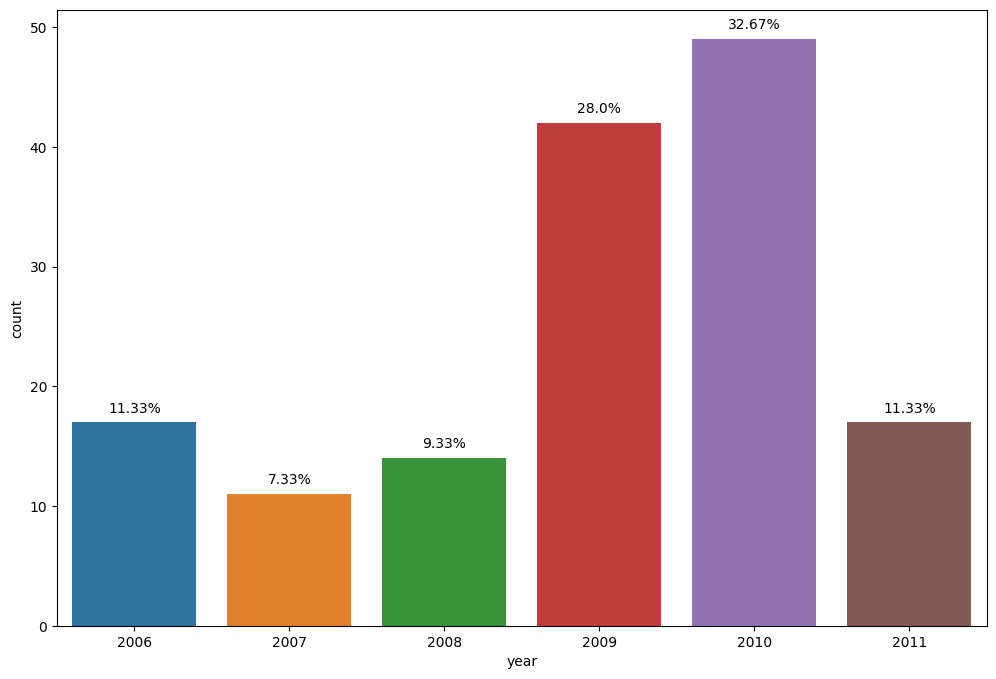

In [4]:



import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,8))
width = len(data['year'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = data, x= 'year')



for p in ax.patches:
    ax.annotate(str((np.round(p.get_height()/len(data)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')



2010 IS HAVING HIGHEST , THEN FOLLOWED BY 2006, 2011

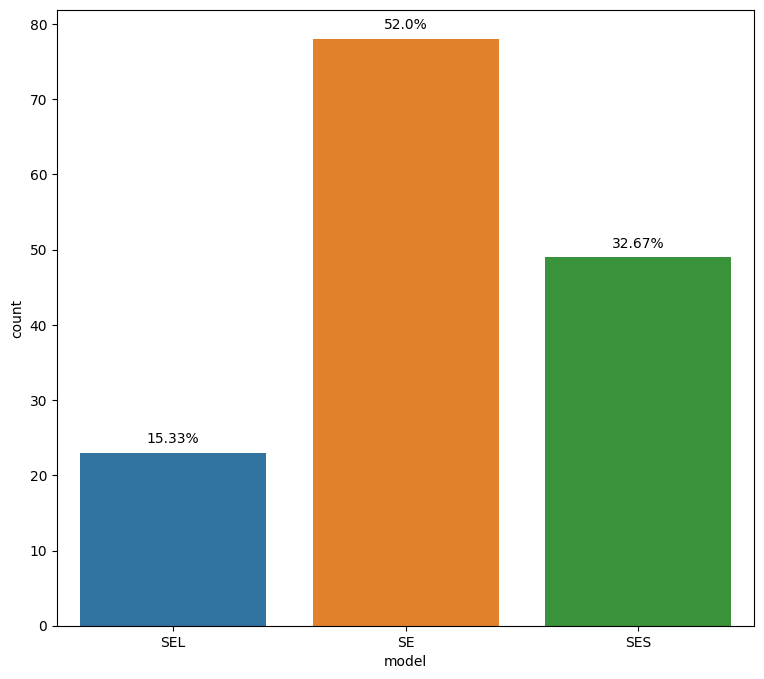

In [5]:


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,8))
width = len(data['model'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = data, x= 'model')



for p in ax.patches:
    ax.annotate(str((np.round(p.get_height()/len(data)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')



SE MODEL IS HAVING HIGHEST SHARE , THEN SES

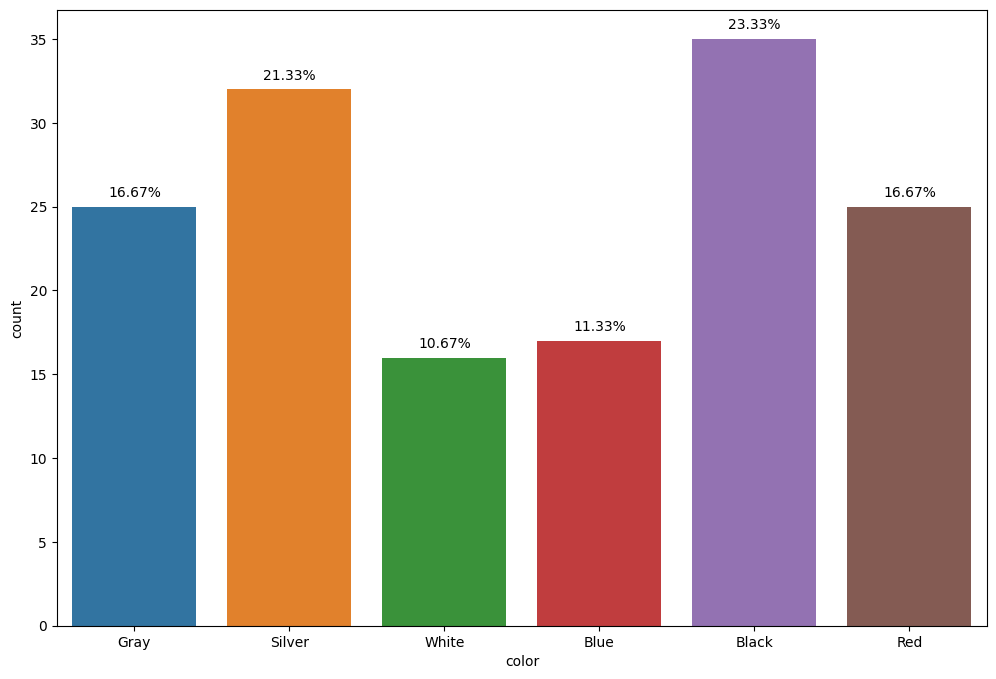

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,8))
width = len(data['color'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = data, x= 'color')



for p in ax.patches:
    ax.annotate(str((np.round(p.get_height()/len(data)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


MOST PREFER BLACK , THEN SILVER FOLLOWED BY GRAY AND RED

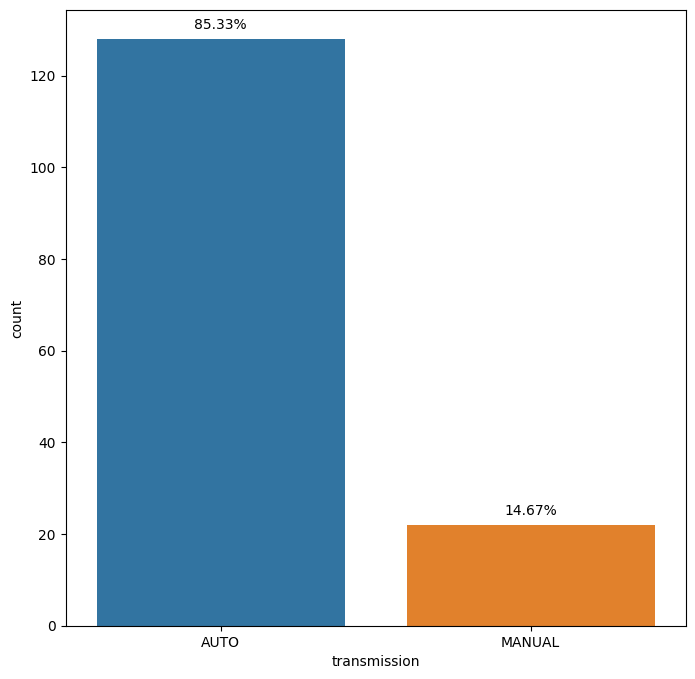

In [7]:


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,8))
width = len(data['transmission'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = data, x= 'transmission')



for p in ax.patches:
    ax.annotate(str((np.round(p.get_height()/len(data)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')



 HIGGHEST TRANSMISSION IS AUTO  , THEN MANUAL

In [66]:
#from sklearn.preprocessing import OneHotEncoder
#ohe=OneHotEncoder()
#cols=['transmission','color','model','year']
#enc_data = pd.DataFrame(ohe.fit_transform( data[['transmission','color','model','year']]).toarray())

In [67]:
#New_df = data.join(enc_data)

In [69]:
#New_df = New_df.drop(['transmission','color','model','year'], axis = 1)
#New_df.insert(loc = 19,          column = 'price_',     value = New_df['price'])

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense

le =LabelEncoder()
cols=['transmission','color','model','year']
data[cols]=data[cols].apply(LabelEncoder().fit_transform)

for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer


In [9]:
data

,year,model,price,mileage,color,transmission
0,5,1,21992,7413,2,0
1,5,1,20995,10926,2,0
2,5,1,19995,7351,4,0
3,5,1,17809,11613,2,0
4,5,0,17500,8367,5,0
...,...,...,...,...,...,...
145,0,2,6200,95000,4,0
146,0,0,5995,87003,3,0
147,0,0,5980,96841,3,0
148,0,0,4899,151479,2,0




A. Convert categorical features to numerical features.
B. Do normalization of the dataset using appropriate method.

In [10]:
from sklearn.preprocessing import MinMaxScaler
# scale features

scaler = MinMaxScaler()
model=scaler.fit(data[['mileage']])
scaled_data=model.transform(data[['mileage']])


# print scaled features
data.insert(loc = 4,column = 'mileage_scaled', value = scaled_data)


model=scaler.fit(data[['price']])
scaled_data2=model.transform(data[['price']])


data.insert(loc = 6,column = 'price_scaled',value = scaled_data2)

In [11]:
data = data.drop(["price"], axis = 1)
data = data.drop(["mileage"], axis = 1)


In [12]:
data

,year,model,mileage_scaled,color,price_scaled,transmission
0,5,1,0.017366,2,1.000000,0
1,5,1,0.041327,2,0.945196,0
2,5,1,0.016943,4,0.890226,0
3,5,1,0.046013,2,0.770064,0
4,5,0,0.023873,5,0.753078,0
...,...,...,...,...,...,...
145,0,2,0.614772,4,0.131926,0
146,0,0,0.560227,3,0.120657,0
147,0,0,0.627329,3,0.119833,0
148,0,0,1.000000,2,0.060411,0


In [13]:
data.insert(loc = 6,column = 'price_scale',value = data['price_scaled'])

In [14]:
data = data.drop(["price_scaled"], axis = 1)


In [15]:
data

,year,model,mileage_scaled,color,transmission,price_scale
0,5,1,0.017366,2,0,1.000000
1,5,1,0.041327,2,0,0.945196
2,5,1,0.016943,4,0,0.890226
3,5,1,0.046013,2,0,0.770064
4,5,0,0.023873,5,0,0.753078
...,...,...,...,...,...,...
145,0,2,0.614772,4,0,0.131926
146,0,0,0.560227,3,0,0.120657
147,0,0,0.627329,3,0,0.119833
148,0,0,1.000000,2,0,0.060411


In [16]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year              2.000000
model             2.000000
mileage_scaled    0.190464
color             3.000000
transmission      0.000000
price_scale       0.214902
dtype: float64


In [17]:
np.where((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

(array([  0,   1,  20,  31,  42,  48,  54,  56,  61,  63,  84,  85,  89,
         95,  99, 100, 103, 110, 117, 119, 123, 130, 132, 134, 135, 136,
        137, 140, 143, 144, 148, 148, 149, 149]),
 array([5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        2, 4, 4, 4, 2, 2, 2, 2, 2, 5, 2, 5]))

In [18]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))

data1 = data[(z < 3).all(axis=1)]
data1.shape, data.shape

((148, 6), (150, 6))

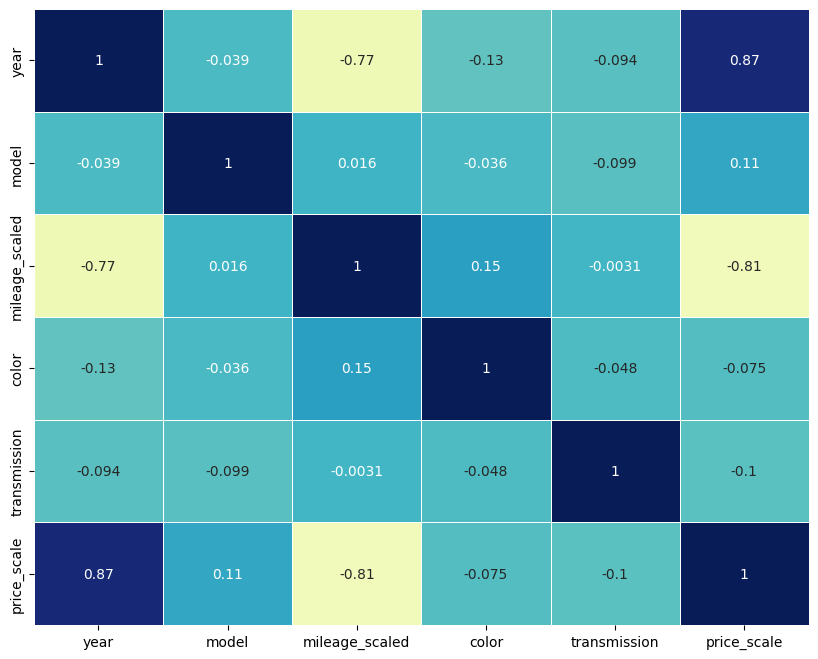

In [19]:
import seaborn as sns


plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

PRICE AND YEAR ARE POSITIVELY CORRELATED

MILEAGE AND YEAR , AND MILEAGE AND PRICE ARE NEGATIVELY CORRELATED

 Split the data into X_train, X_test, Y_train, Y_test [1 Marks]

In [21]:
X_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1]


X_train = preprocessing.normalize(X_data)

y_data = np.array(y_data)
import collections
from collections import Counter
y_data = np.array(y_data)
y_data.reshape(-1,1)

array([[1.        ],
       [0.94519569],
       [0.89022647],
       [0.77006376],
       [0.75307828],
       [0.75280343],
       [0.72559367],
       [0.72531882],
       [0.72531882],
       [0.72531882],
       [0.72531882],
       [0.72515391],
       [0.72284521],
       [0.72284521],
       [0.67062445],
       [0.67056948],
       [0.67056948],
       [0.6703496 ],
       [0.6701847 ],
       [0.6701847 ],
       [0.66996482],
       [0.66952507],
       [0.66507256],
       [0.66452287],
       [0.65347405],
       [0.64313984],
       [0.64308487],
       [0.64308487],
       [0.63203606],
       [0.61560026],
       [0.61560026],
       [0.61538039],
       [0.61521548],
       [0.61521548],
       [0.61521548],
       [0.61510554],
       [0.61505057],
       [0.61048813],
       [0.61015831],
       [0.60977353],
       [0.60251759],
       [0.5991095 ],
       [0.59790018],
       [0.59086412],
       [0.58811566],
       [0.58789578],
       [0.58789578],
       [0.587

In [22]:


from sklearn.preprocessing import StandardScaler
X_data = StandardScaler().fit_transform(X_data)
#y_data = StandardScaler().fit_transform(y_data.reshape(len(y_data),1))[:,0]

X_temp, X_test, y_temp, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=12 )
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3,random_state=12)

print(Counter(y_train))


print(Counter(y_test))




Counter({0.5604111697449429: 4, 0.5054419525065963: 4, 0.6152154793315744: 2, 0.23059586631486367: 2, 0.5602462620932278: 2, 0.6156002638522428: 2, 0.7253188214599825: 2, 0.3407541776605101: 2, 0.6151055408970977: 1, 0.5249560246262094: 1, 0.47823218997361483: 1, 0.7530782761653474: 1, 0.28583992963940197: 1, 0.5386433597185576: 1, 0.5878957783641161: 1, 0.5545294635004397: 1, 0.5421613896218118: 1, 0.2253737906772208: 1, 0.39550351802990324: 1, 0.2748460861917327: 1, 0.7700637642919965: 1, 0.5290787159190854: 1, 0.6104881266490766: 1, 0.44986807387862804: 1, 0.890226473175022: 1, 0.3216248900615656: 1, 0.48944591029023754: 1, 0.5881156552330695: 1, 0.2857849604221636: 1, 0.5979001759014952: 1, 0.5050571679859279: 1, 0.4496481970096746: 1, 0.6431398416886543: 1, 0.0: 1, 0.25725593667546176: 1, 0.3933047493403694: 1, 0.20272647317502202: 1, 0.17480211081794195: 1, 0.28562005277044855: 1, 0.549637203166227: 1, 0.43931398416886547: 1, 0.5579375549692173: 1, 0.4936235708003518: 1, 0.437225

A. Design a Neural Network to train the model.
B. Train the model using suitable parameters
C. Evaluate performance of the model with appropriate metrics.
D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy

In [23]:
import tensorflow as tf
keras = tf.keras

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = X_train.shape[1], activation='ReLU'))

NN_model.add(Dropout(0.5))
# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='ReLU'))
NN_model.add(Dropout(0.5))

NN_model.add(Dense(64, kernel_initializer='normal',activation='ReLU'))
NN_model.add(Dropout(0.5))

NN_model.add(Dense(32, kernel_initializer='normal',activation='ReLU'))
NN_model.add(Dropout(0.5))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))


optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1536      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [24]:
history=(NN_model.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=50, batch_size=100))

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.4775 - mean_absolute_error: 0.4775 - val_loss: 0.5129 - val_mean_absolute_error: 0.5129
Epoch 2/50
1/1 [==============================] - 0s 51ms/step - loss: 0.4759 - mean_absolute_error: 0.4759 - val_loss: 0.5089 - val_mean_absolute_error: 0.5089
Epoch 3/50
1/1 [==============================] - 0s 69ms/step - loss: 0.4723 - mean_absolute_error: 0.4723 - val_loss: 0.5042 - val_mean_absolute_error: 0.5042
Epoch 4/50
1/1 [==============================] - 0s 67ms/step - loss: 0.4652 - mean_absolute_error: 0.4652 - val_loss: 0.4989 - val_mean_absolute_error: 0.4989
Epoch 5/50
1/1 [==============================] - 0s 50ms/step - loss: 0.4605 - mean_absolute_error: 0.4605 - val_loss: 0.4931 - val_mean_absolute_error: 0.4931
Epoch 6/50
1/1 [==============================] - 0s 69ms/step - loss: 0.4529 - mean_absolute_error: 0.4529 - val_loss: 0.4863 - val_mean_absolute_error: 0.4863
Epoch 7/50
1/1 [====================

In [25]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

nn_pred = NN_model.predict(X_val)
MAE = mean_absolute_error(y_val , nn_pred)
print('validation MAE = ',MAE)

print(X_val)
print(nn_pred)


1/1 [==============================] - 0s 108ms/step
validation MAE =  0.09870425041637194
[[ 0.69439854  1.32650833 -0.718862    0.97608601 -0.4145781 ]
 [ 0.01803633 -0.89668999 -0.28066499 -0.78086881 -0.4145781 ]
 [ 0.69439854  1.32650833 -0.82670071 -0.1952172  -0.4145781 ]
 [-2.01105031  1.32650833  2.80601351 -1.36652042 -0.4145781 ]
 [ 0.01803633 -0.89668999 -0.0719785  -0.78086881 -0.4145781 ]
 [ 0.69439854  1.32650833 -0.45376471  0.3904344  -0.4145781 ]
 [ 0.01803633 -0.89668999  0.00956988  0.3904344  -0.4145781 ]
 [-2.01105031 -0.89668999  1.95524047  0.3904344  -0.4145781 ]
 [ 0.69439854  1.32650833 -0.30286489  0.97608601 -0.4145781 ]
 [ 0.01803633 -0.89668999 -0.29780762  0.97608601  2.41209076]
 [ 0.69439854 -0.89668999 -1.0818694  -1.36652042  2.41209076]
 [-2.01105031  1.32650833  0.93538378 -0.78086881 -0.4145781 ]
 [ 0.69439854 -0.89668999 -0.72161375 -0.78086881 -0.4145781 ]
 [ 0.01803633 -0.89668999  0.61164454  0.3904344  -0.4145781 ]
 [ 1.37076075  0.21490917 -

Plot visuals

2/2 [==============================] - 0s 8ms/step - loss: 0.0728 - mean_absolute_error: 0.0728
Train: 0.083, Test: 0.073


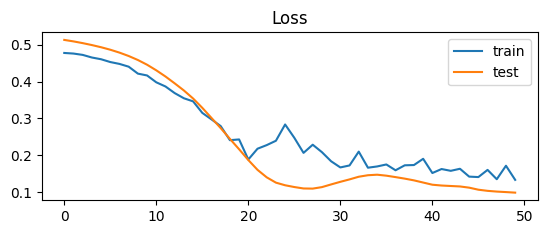

In [26]:
from matplotlib import pyplot
# evaluate the model
_, train_acc = NN_model.evaluate(X_train, y_train)
_, test_acc = NN_model.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

TRAIN AND TEST LOSS ARE LOW IN RANGE OF 0.08 AND 0.07

Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [27]:

from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.ensemble import RandomForestRegressor # for building the model

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train )

Rfmodel = RandomForestRegressor()
Rfmodel.fit(X_train,y_train )

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_val)

Rfpred=Rfmodel.predict(X_val)
MAE = mean_absolute_error(y_val , XGBpredictions)
print('XGBoost validation MAE = ',MAE)


MAE2 = mean_absolute_error(y_val , Rfpred)
print('random forest validation MAE = ',MAE2)

XGBoost validation MAE =  0.07099966942990017
random forest validation MAE =  0.06801882352132806


HERE RANDOM FOREST GIVES LOW LOSS AT 0.068 THAN OTHERS